# Plotting Lab

In the `datasets/` folder in this notebook you will find the `salary` dataset.

- `salary.csv` -- a dataset comparing salary data across gender and tenure lines for academics 

Your task is to use Matplotlib and Seaborn to create high-quality plots for this dataset. 

**Your deliverable for this lab is to push a completed version to your Github Enterprise account by Wednesday. This is a requireed homework assignment.**

Part of effective data science work is to be able to take new datasets and investigate them for interesting correlations or relationships that might be the basis of future research or investigation. Take this lab as an opportunity to practice those skills as well and how plotting can help you in that goal!

##### Useful Workflow Tips

1. Open the data and do a quick EDA:
  - How many rows and columns?
  - Is there missing data?
  - What do each of the columns mean?
    - Sometimes it may not be clear at first glance so double check
    - Googling for some insight into that domain (such as salary information for the academic world) is not just highly encouraged, but may be 100% required in some cases
  - At first glance, are there columns that you think might have an interesting relationship?
2. Begin plotting:
  - If a variable of interest is encoded as a string, do some feature extraction / transformation to turn it into numeric values
  - Use something like seaborn's pairplot to visualize overall relationships
  - Start digging into bivariate (involving or depending on two variables) relationships
3. Refine plots:
  - Try different plotting types / plotting options to create accurate and interesting plots
  - Remember to include titles, axes labels, etc.
  - **Does your plot have a story? What should a reader take away from your plot?**

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import seaborn as sns

%matplotlib inline

# Salary

In [3]:
salary = pd.read_csv('datasets/salary.csv')
salary.head()

,sx,rk,yr,dg,yd,sl
0,male,full,25,doctorate,35,36350
1,male,full,13,doctorate,22,35350
2,male,full,10,doctorate,23,28200
3,female,full,7,doctorate,27,26775
4,male,full,19,masters,30,33696


`1. How many rows and columns?`

In [4]:
salary.shape

(52, 6)

`2. Check for missing values`

In [5]:
salary.isnull().sum()

sx    0
rk    0
yr    0
dg    0
yd    0
sl    0
dtype: int64

`3. Review datatypes for each column in your dataframe. Per the instructions above, convert any as needed.`

In [6]:
salary.dtypes

sx    object
rk    object
yr     int64
dg    object
yd     int64
sl     int64
dtype: object

In [7]:
salary.head()

,sx,rk,yr,dg,yd,sl
0,male,full,25,doctorate,35,36350
1,male,full,13,doctorate,22,35350
2,male,full,10,doctorate,23,28200
3,female,full,7,doctorate,27,26775
4,male,full,19,masters,30,33696


`4. Visualize the distributions of the series or columns in your dataframe.`
- `What type or types of plots are most appropriate here?`

`4a.`

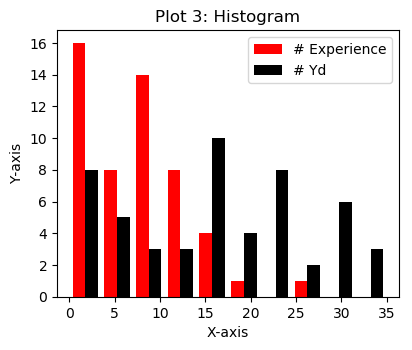

In [8]:
fig = plt.figure(figsize=(15,12), dpi=100)

ax3 = plt.subplot(3, 3, 4)
ax3.set_title('Plot 3: Histogram')
ax3.set_ylabel('Y-axis')
ax3.set_xlabel('X-axis')
ax3.hist([salary.yr,salary.yd],color=['red','black'],label=['# Experience','# Yd '],
         histtype='bar',bins=10)
ax3.legend()
plt.show()

`4b.`

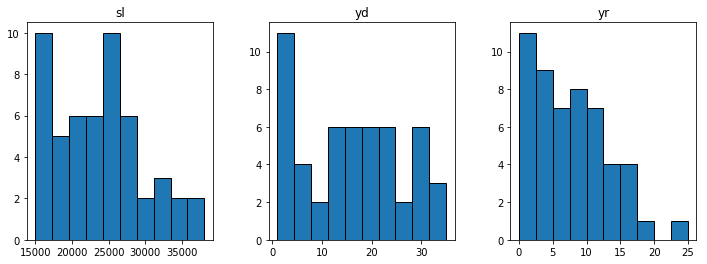

In [12]:
salary.hist(grid=False, edgecolor='#000000', figsize=(12,4), layout=(1,3));

`4c.`

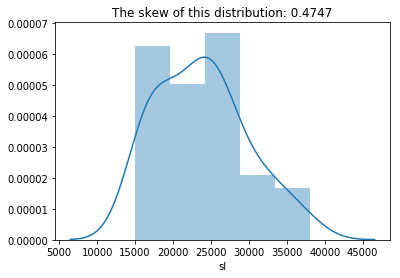

In [30]:
sns.distplot(salary.sl)
plt.title("The skew of this distribution: {:.4f}".format(salary.sl.skew()));

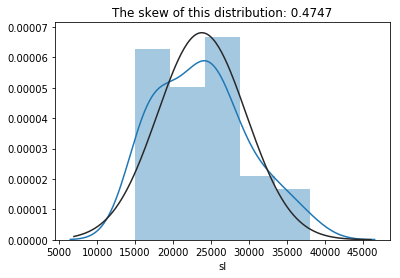

In [45]:
# This fits a normal distribution on your graph output
from scipy.stats import norm
sns.distplot(salary.sl, fit=norm)   # fit_kws={"color":"red"},
plt.title("The skew of this distribution: {:.4f}".format(salary.sl.skew()));

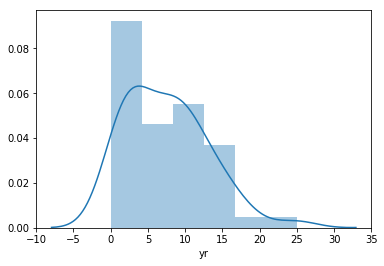

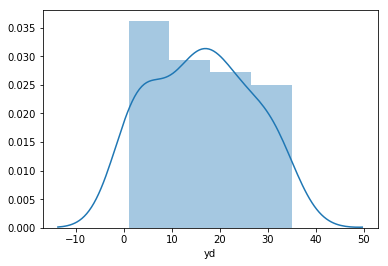

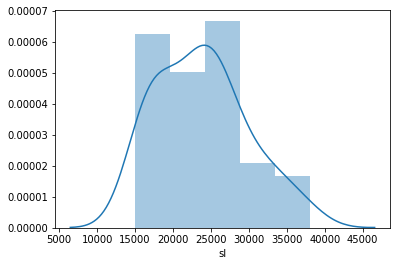

In [48]:
subset = salary.select_dtypes([np.int, np.float])

for i, col in enumerate(subset.columns):
    plt.figure(i)
    sns.distplot(subset[col])

## Box plot

`4d. BONUS: Include the skew of each continuous variable distribution in the title of the plot.`

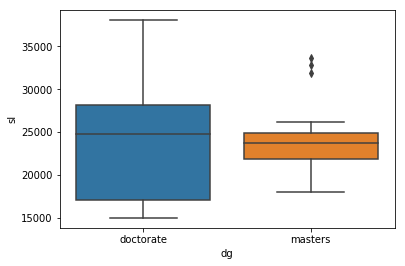

In [49]:
sns.boxplot(data=salary, x='dg',y='sl');

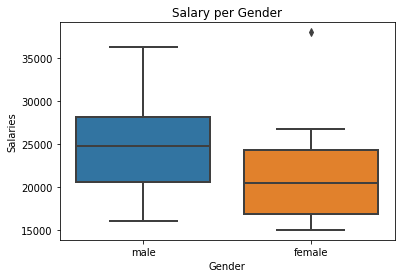

In [13]:
sns_plot=sns.boxplot(x='sx', y='sl', data=salary, linewidth=2)
## outstanding..
plt.title('Salary per Gender')
plt.xlabel('Gender')
plt.ylabel('Salaries');

`5. Visualize the relationships between series or columns in your dataframe.`
- `What type or types of plots are most appropriate here?`

`5a.`

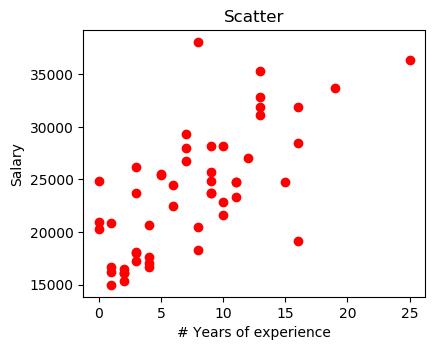

In [8]:
fig = plt.figure(figsize=(15,12), dpi=100)

ax3 = plt.subplot(3, 3, 4)
ax3.set_title('Scatter')
ax3.set_ylabel('Salary')
ax3.set_xlabel('# Years of experience')
ax3.scatter(salary.yr,salary.sl,color="red")
plt.show()

`5b.`

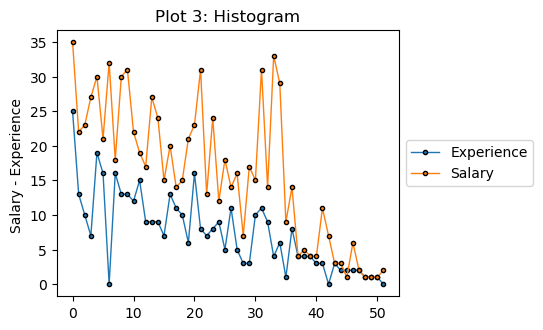

In [72]:
fig = plt.figure(figsize=(15,12), dpi=100)

ax1 = plt.subplot(3, 3, 4)
ax1.set_title('Plot 3: Histogram')
ax1.set_ylabel('Salary - Experience ')

xs = [x for x in range(0, 52)]
ax1.plot(xs,salary.yr,label='Experience', linewidth=1,marker='.',markeredgecolor='black')
ax1.plot(xs,salary.yd,label='Salary', linewidth=1,marker='.',markeredgecolor='black')
ax1.legend(loc='center left', bbox_to_anchor=(1, 0.5))

plt.show()

# This reads as more of a line plot to me than a histogram

`5c.`

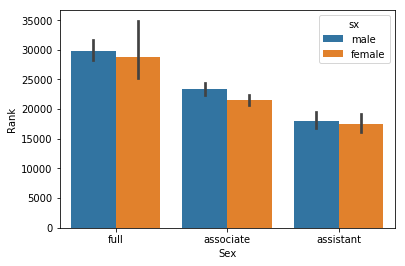

In [53]:
sns.barplot(x = 'rk', y='sl', data = salary, hue='sx')
plt.xlabel('Sex')
plt.ylabel('Rank');

`5d. Save at least one plot as a png file.`

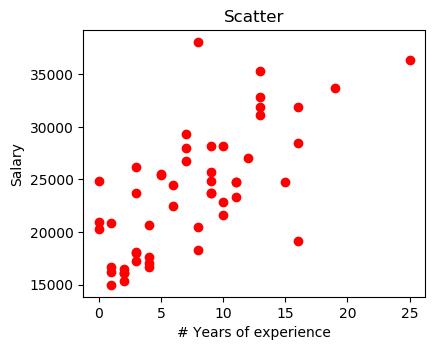

In [10]:
fig = plt.figure(figsize=(15,12), dpi=100)


ax3 = plt.subplot(3, 3, 4)
ax3.set_title('Scatter')
ax3.set_ylabel('Salary')
ax3.set_xlabel('# Years of experience')
ax3.scatter(salary.yr,salary.sl,color="red")
plt.show()

# After running this code, check your directory...

fig.savefig('Comparing.png')   # save the figure to file
plt.close(fig)

`6. Check for correlation between variables in your dataframe.`

In [12]:
salary.corr().style

,yr,yd,sl
yr,1,0.638776,0.700669
yd,0.638776,1,0.674854
sl,0.700669,0.674854,1


`7. Now visualize that correlation output:`

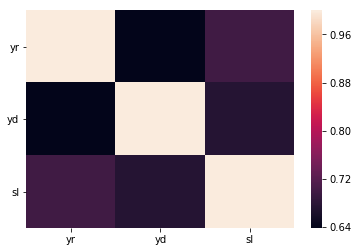

In [14]:
sns.heatmap(output)
plt.yticks(rotation=0);

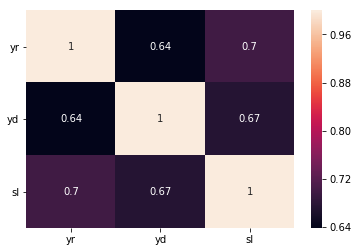

In [15]:
sns.heatmap(output,annot=True)
plt.yticks(rotation=0);

`8. Write up a paragraph or two to explain the plot choices you made earlier in the notebook.
Additionally, explain what you've learned about this dataset comparing salary data across gender and tenure lines for academics.`

**Data Visualization is power in the hand of the data scientist that's not an opinion it's a fact.
The steps needed to find the right visualization is first to explore the data. 
After exploring think of the required output.**
- If the aim to visualize a between columns thinks of __scatter__.
- If the aim to visualize is for a distributions think of __histgram__.

__That's just for summarizing, there might be a lot more complex way such as the use of a line for a relationship, but that's what I notice.__

**To wrap up I would say that meditating on the required output after that meditate on your the plot you have chosen, it will make decisions and moving forward much wiser.**